<a href="https://colab.research.google.com/github/wangjiansuperagain/Unimi-DSE-Machine-Learning-Project/blob/main/experimental%20nn%20model%20with%20artifitial%20pics(to%20be%20improved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
num_classes = 10  # There are 10 digits (0 to 9)
input_shape = (28, 28, 1)  # MNIST images are 28x28 pixels

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [6]:
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 43s 99ms/step - loss: 0.3752 - accuracy: 0.8830 - val_loss: 0.0836 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 40s 96ms/step - loss: 0.1124 - accuracy: 0.9656 - val_loss: 0.0528 - val_accuracy: 0.9860
Epoch 3/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0845 - accuracy: 0.9739 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 40s 94ms/step - loss: 0.0688 - accuracy: 0.9784 - val_loss: 0.0415 - val_accuracy: 0.9903
Epoch 5/15
422/422 [==============================] - 40s 94ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.0381 - val_accuracy: 0.9908
Epoch 6/15
422/422 [==============================] - 41s 96ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0345 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0353 - val_accuracy:

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.027515918016433716
Test accuracy: 0.9919000267982483




Prepare the new data: This data should be formatted in the same way as your training and testing data. If it's an image, for example, it should be 28x28 pixels, grayscale, and normalized (values between 0 and 1). Here's how you might prepare a single new image:


Using an Image from the MNIST Dataset


1/1 [==============================] - 0s 120ms/step


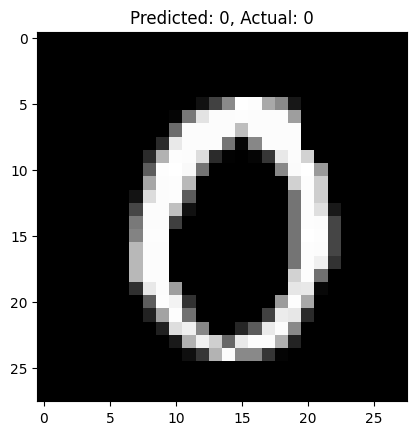

In [8]:
# Selecting an example from the test set
example_idx = 13  # Change this to select a different image
example_image = x_test[example_idx]
example_label = y_test[example_idx]

# Prepare the image
example_image_prepared = example_image.reshape(-1, 28, 28, 1)  # Reshape for the model

# Predict the class
prediction = model.predict(example_image_prepared)
predicted_class = np.argmax(prediction, axis=1)

# Display the results
import matplotlib.pyplot as plt
plt.imshow(example_image.reshape(28, 28), cmap='gray')  # Reshape back to 2D image for plotting
plt.title(f'Predicted: {predicted_class[0]}, Actual: {np.argmax(example_label)}')
plt.show()


Creating a Synthetic Image


1/1 [==============================] - 0s 38ms/step


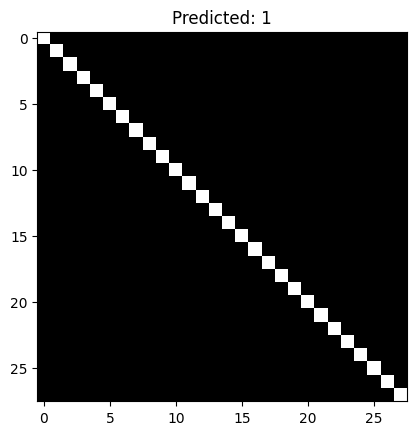

In [11]:
# Create a blank canvas
synthetic_image = np.zeros((28, 28), dtype=np.float32)

# Draw a simple shape, e.g., a diagonal line that might look like a sloppy 1 or 7
for i in range(28):
    synthetic_image[i, i] = 5  # This creates a diagonal line

# Prepare the synthetic image for the model
synthetic_image_prepared = synthetic_image.reshape(-1, 28, 28, 1) / 255  # Reshape and normalize

# Predict the class
prediction = model.predict(synthetic_image_prepared)
predicted_class = np.argmax(prediction, axis=1)

# Display the results
plt.imshow(synthetic_image, cmap='gray')
plt.title(f'Predicted: {predicted_class[0]}')
plt.show()


Vertical Line (Mimicking "1"):


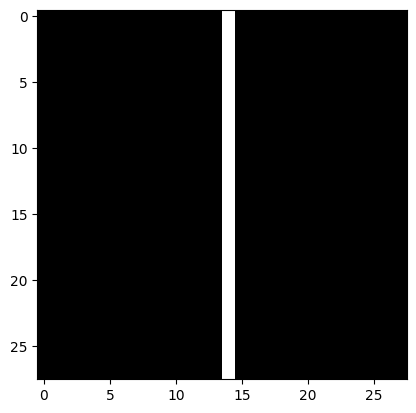

In [12]:
# Create a blank canvas
synthetic_image = np.zeros((28, 28), dtype=np.float32)

# Draw a vertical line in the center
for i in range(28):
    synthetic_image[i, 14] = 1  # This creates a vertical line in the middle

# Display the synthetic image
plt.imshow(synthetic_image, cmap='gray')
plt.show()


Horizontal Line (Less common for digits but for experimentation):


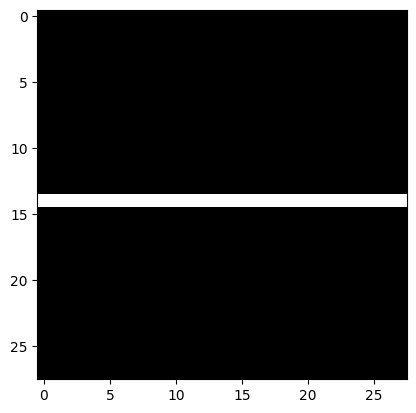

In [16]:
# Create a blank canvas
synthetic_image = np.zeros((28, 28), dtype=np.float32)

# Draw a horizontal line in the middle
for i in range(28):
    synthetic_image[14, i] = 1  # This creates a horizontal line at the center

# Display the synthetic image
plt.imshow(synthetic_image, cmap='gray')
plt.show()


Circle (Mimicking "0"):


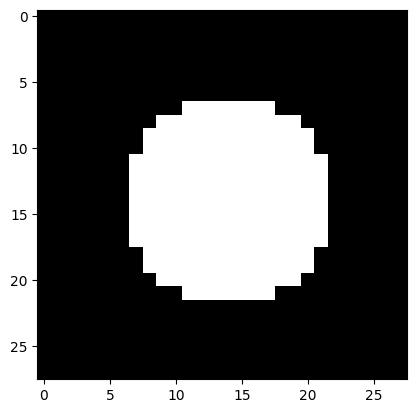

In [18]:
# Create a blank canvas
synthetic_image = np.zeros((28, 28), dtype=np.float32)

# Draw a rough circle
center, radius = (14, 14), 8  # Center and radius of circle
for y in range(28):
    for x in range(28):
        if (x - center[0]) ** 2 + (y - center[1]) ** 2 < radius ** 2:
            synthetic_image[y, x] = 1

# Display the synthetic image
plt.imshow(synthetic_image, cmap='gray')
plt.show()


Custom Shapes:


In [19]:
# Normalize and reshape
synthetic_image_prepared = synthetic_image.reshape(-1, 28, 28, 1) / 255

# Predict with your model
prediction = model.predict(synthetic_image_prepared)
predicted_class = np.argmax(prediction, axis=1)

# Print the predicted class
print('Predicted class:', predicted_class[0])


1/1 [==============================] - 0s 21ms/step
Predicted class: 1


Make predictions: Use the predict method of your model to get the predictions. This method returns the probabilities that the new data belongs to each class.



In [ ]:
predictions = model.predict(new_image)


In [ ]:
predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predicted_class)


Interpret the result: The value of predicted_class is the digit that the model predicts the image represents. Compare this with the actual value, if available, to see if the prediction was correct.

